# Import des modules


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.pipeline import Pipeline

#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MultiLabelBinarizer, MinMaxScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold

bc = pd.read_csv('seatle_after_feature_engineering.csv')

# MODELISATION


Training models for: SiteEnergyUse(kBtu)

Training models...

Permutation Importance for DummyRegressor:
                             feature  importance_mean  importance_std
0                 PropertyGFAParking              0.0             0.0
44  p_Fitness Center/Health Club/Gym              0.0             0.0
50             p_Multifamily Housing              0.0             0.0
49                  p_Medical Office              0.0             0.0
48  p_Manufacturing/Industrial Plant              0.0             0.0

Results for DummyRegressor:
R² Score: -0.0029
MAE: 1953754.4519
MAPE: 169.69%
RMSE: 2478117.4450
------------------------------


/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: i


Permutation Importance for LinearRegression:
                            feature  importance_mean  importance_std
3                    GFAByBuildings         0.577229        0.045833
38                    ppt_Warehouse         0.066944        0.009792
36  ppt_Supermarket / Grocery Store         0.060732        0.018589
33        ppt_Self-Storage Facility         0.059550        0.008868
21                  ppt_K-12 School         0.040274        0.005930

Results for LinearRegression:
R² Score: 0.5223
MAE: 1218477.4790
MAPE: 74.67%
RMSE: 1710358.8606
------------------------------

Permutation Importance for SVR:
               feature  importance_mean  importance_std
1         YearBuiltAge     2.553130e-05    1.352382e-05
3       GFAByBuildings     4.666784e-07    3.844095e-08
0   PropertyGFAParking     1.394403e-07    2.363173e-08
4          GFAByFloors     4.675895e-08    1.328589e-08
57           p_Parking     1.613895e-08    3.586010e-09

Results for SVR:
R² Score: -0.1068
MAE: 1

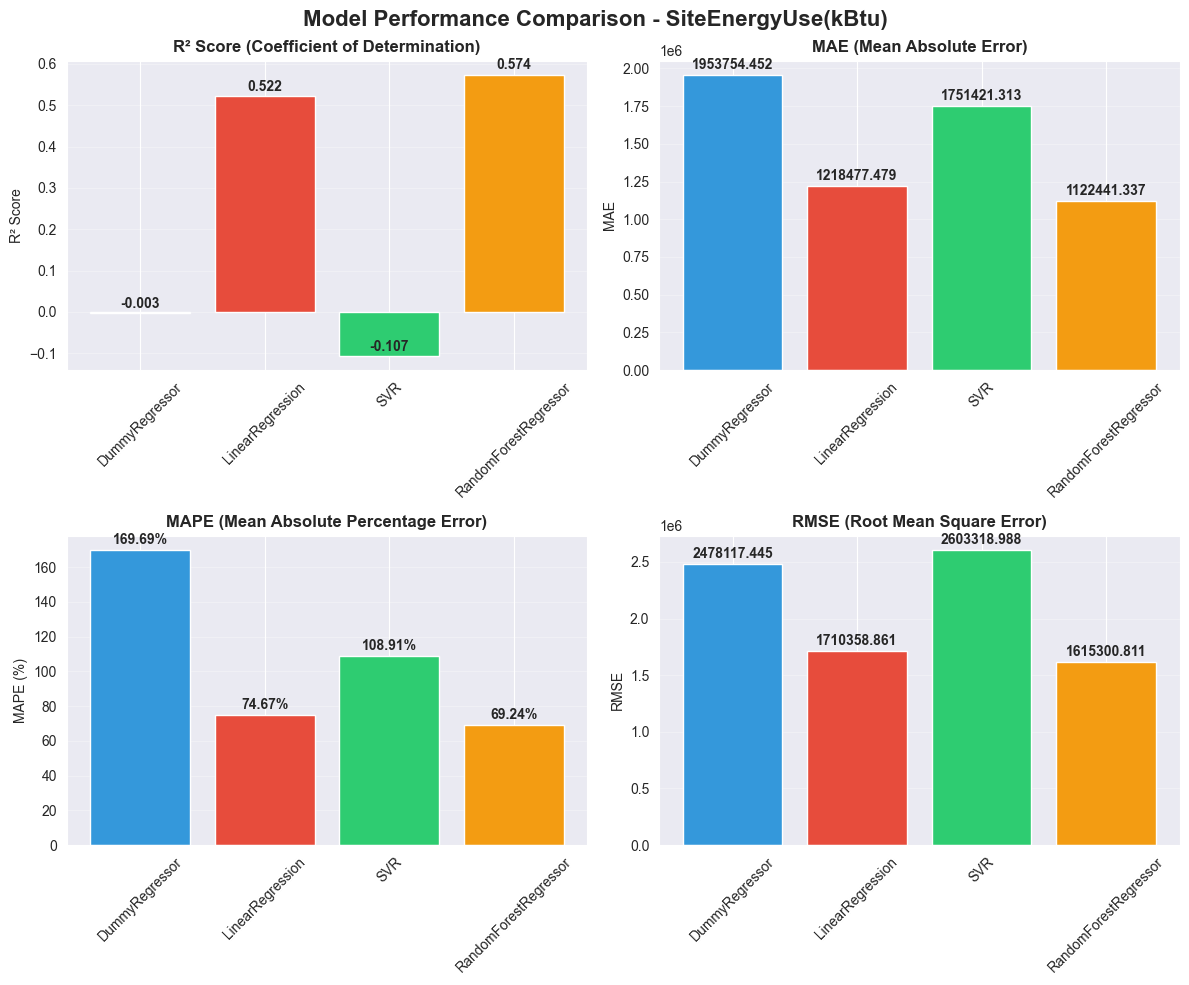


Training models for: TotalGHGEmissions

Training models...

Permutation Importance for DummyRegressor:
                             feature  importance_mean  importance_std
0                 PropertyGFAParking              0.0             0.0
44  p_Fitness Center/Health Club/Gym              0.0             0.0
50             p_Multifamily Housing              0.0             0.0
49                  p_Medical Office              0.0             0.0
48  p_Manufacturing/Industrial Plant              0.0             0.0

Results for DummyRegressor:
R² Score: -0.0019
MAE: 42.2747
MAPE: 325.64%
RMSE: 56.7461
------------------------------


/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: i


Permutation Importance for LinearRegression:
                            feature  importance_mean  importance_std
3                    GFAByBuildings         0.262670        0.034694
46                          p_Hotel         0.185983        0.014084
2                            HasGas         0.152302        0.026448
36  ppt_Supermarket / Grocery Store         0.077961        0.021419
47                    p_K-12 School         0.064129        0.018041

Results for LinearRegression:
R² Score: 0.3948
MAE: 31.0177
MAPE: 123.86%
RMSE: 44.1035
------------------------------

Permutation Importance for SVR:
                         feature  importance_mean  importance_std
3                 GFAByBuildings         0.007590        0.001061
2                         HasGas         0.002621        0.000423
4                    GFAByFloors         0.001320        0.000565
0             PropertyGFAParking         0.000887        0.000364
51  p_Non-Refrigerated Warehouse         0.000316        

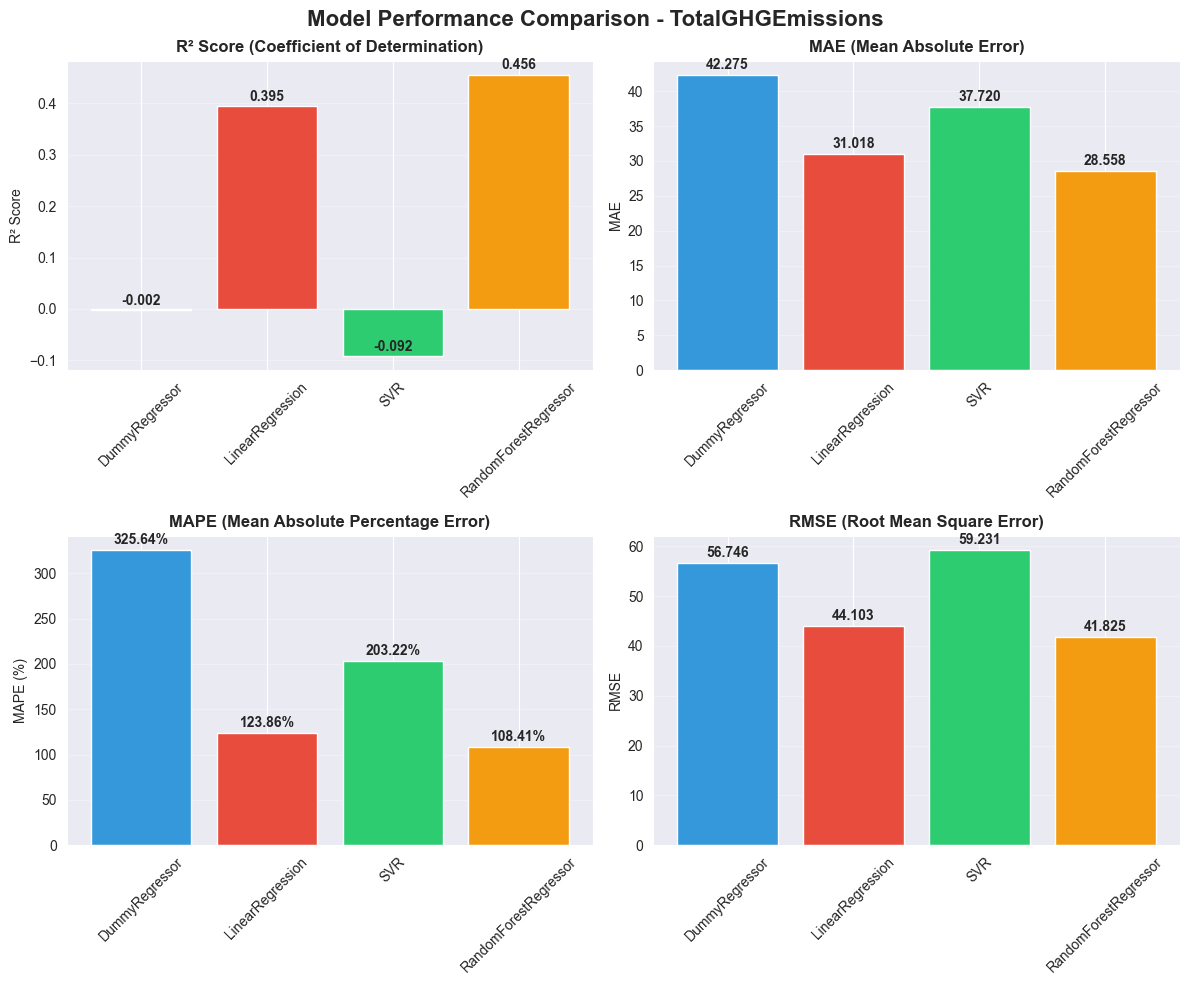

In [43]:
predicts = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for predict in predicts:
    print(f"\n{'='*50}")
    print(f"Training models for: {predict}")
    print('='*50)

    y = bc[predict]
    list_model = []  # Reset for each prediction target

    def modelisation(model_name, model, X_train, y_train, X_test, y_test, X):
        num_features = ['GFAByFloors', 'GFAByBuildings','PropertyGFAParking']

        # Préprocesseur
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), num_features),       # scaling des numériques
            ],
            remainder='passthrough'  # Keep other features as-is
        )

        # Pipeline = preprocessing + modèle
        pipeline = Pipeline(steps=[
            ("preprocessing", preprocessor),
            ("model", model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)*100
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        model_results = {
                'model_name': model_name,
                'r2_score': r2,
                'mae': mae,
                'mape': mape,
                'rmse': rmse
            }

        list_model.append(model_results)

        # Fixed: Use the fitted pipeline for permutation importance
        perm_imp = permutation_importance(
            pipeline, X_test, y_test, n_repeats=10, random_state=666
        )

        feature_names = X.columns

        perm_imp_df = pd.DataFrame({
            'feature': feature_names,
            'importance_mean': perm_imp.importances_mean,
            'importance_std': perm_imp.importances_std
            })

        importance_df = perm_imp_df.sort_values('importance_mean', ascending=False)
        print(f"\nPermutation Importance for {model_name}:")
        print(importance_df.head(5))

        print(f"\nResults for {model_name}:")
        print(f"R² Score: {r2:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.2f}%")
        print(f"RMSE: {rmse:.4f}")
        print("-" * 30)

        return list_model

    ##############################################################################

    p_columns = [col for col in bc.columns if col.startswith('p_')]
    ppt_columns = [col for col in bc.columns if col.startswith('ppt_')]
    nbh_columns = [col for col in bc.columns if col.startswith('nbh_')]

    # GROUPE de FEATURES 1
    #base_columns = ['PropertyGFAParking', 'YearBuiltDecade', 'HasGas', 'GFAByBuildings','GFAByFloors']
    #all_columns = base_columns

    # GROUPE de FEATURES 2
    #base_columns = ['PropertyGFAParking', 'YearBuiltDecade', 'HasGas','GFAByBuildings','GFAByFloors']
    #all_columns = base_columns + nbh_columns

    # GROUPE de FEATURES 3
    base_columns = ['PropertyGFAParking', 'YearBuiltAge', 'HasGas', 'GFAByBuildings', 'GFAByFloors']
    all_columns = base_columns + nbh_columns + ppt_columns + p_columns

    X = bc[all_columns]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=666)

    ##############################################################################
    # Model training and evaluation

    print("\nTraining models...")

    # Dummy Regressor (baseline)
    model_name = 'DummyRegressor'
    model = DummyRegressor(strategy="mean")
    modelisation(model_name, model, X_train, y_train, X_test, y_test, X)

    ##############################################################################

    # Linear Regression
    model_name = 'LinearRegression'
    model = LinearRegression()
    results = modelisation(model_name, model, X_train, y_train, X_test, y_test, X)

    ##############################################################################

    # SVR
    model_name = 'SVR'
    model = SVR(kernel="rbf", C=10, epsilon=0.1, gamma="scale")
    modelisation(model_name, model, X_train, y_train, X_test, y_test, X)

    ##############################################################################

    # Random Forest Regressor
    model_name = 'RandomForestRegressor'
    model = RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_split=5,
        random_state=666
    )
    modelisation(model_name, model, X_train, y_train, X_test, y_test, X)

    ##############################################################################
    # Results visualization

    # Convert to DataFrame for visualization
    df = pd.DataFrame(list_model)

    # Configuration de la figure avec sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Model Performance Comparison - {predict}', fontsize=16, fontweight='bold')

    # Couleurs pour les barres
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

    # 1. R² Score (plus c'est élevé, mieux c'est)
    axes[0,0].bar(df['model_name'], df['r2_score'], color=colors[:len(df)])
    axes[0,0].set_title('R² Score (Coefficient of Determination)', fontweight='bold')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(axis='y', alpha=0.3)
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(df['r2_score']):
        axes[0,0].text(i, v + max(df['r2_score'])*0.01, f'{v:.3f}',
                      ha='center', va='bottom', fontweight='bold')

    # 2. MAE (plus c'est bas, mieux c'est)
    axes[0,1].bar(df['model_name'], df['mae'], color=colors[:len(df)])
    axes[0,1].set_title('MAE (Mean Absolute Error)', fontweight='bold')
    axes[0,1].set_ylabel('MAE')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(axis='y', alpha=0.3)
    for i, v in enumerate(df['mae']):
        axes[0,1].text(i, v + max(df['mae'])*0.01, f'{v:.3f}',
                      ha='center', va='bottom', fontweight='bold')

    # 3. MAPE (plus c'est bas, mieux c'est)
    axes[1,0].bar(df['model_name'], df['mape'], color=colors[:len(df)])
    axes[1,0].set_title('MAPE (Mean Absolute Percentage Error)', fontweight='bold')
    axes[1,0].set_ylabel('MAPE (%)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(axis='y', alpha=0.3)
    for i, v in enumerate(df['mape']):
        axes[1,0].text(i, v + max(df['mape'])*0.01, f'{v:.2f}%',
                      ha='center', va='bottom', fontweight='bold')

    # 4. RMSE (plus c'est bas, mieux c'est)
    axes[1,1].bar(df['model_name'], df['rmse'], color=colors[:len(df)])
    axes[1,1].set_title('RMSE (Root Mean Square Error)', fontweight='bold')
    axes[1,1].set_ylabel('RMSE')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(axis='y', alpha=0.3)
    for i, v in enumerate(df['rmse']):
        axes[1,1].text(i, v + max(df['rmse'])*0.01, f'{v:.3f}',
                      ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()


# VALIDATION CROISEE
- Methode : cross_validate

In [44]:
def perform_cross_validation(
    X: pd.DataFrame,
    y: pd.Series,
    model,
    cross_val_type, # La variante de validation croisée que nous souhaitons utiliser
    scoring_metrics: tuple, # Metriques de notre choix
    return_estimator=False, # Si nous souhaitons stocker les modèles de chaque fold
    groups=None, # Nous verrons l’utilité de cet argument juste après
):
    scores = cross_validate(
        model,
        X.to_numpy(),
        y.to_numpy(),
        cv=cross_val_type,
        return_train_score=True,
        return_estimator=return_estimator,
        scoring=scoring_metrics,
        groups=groups,
    )

    for metric in scoring_metrics:
        print(
            "{metric} Train Average : {metric_value}".format(
                metric=metric,
                metric_value=np.mean(scores["train_" + metric]),
            )
        )
        print(
            "{metric} Train Standard Deviation : {metric_value}".format(
                metric=metric, metric_value=np.std(scores["train_" + metric])
            )
        )
        print(
            "{metric} Test Average : {metric_value}".format(
                metric=metric, metric_value=np.mean(scores["test_" + metric])
            )
        )
        print(
            "{metric} Test Standard Deviation : {metric_value}".format(
                metric=metric, metric_value=np.std(scores["test_" + metric])
            )
        )
        print(" --- ")

    return scores

##############################################################################

predicts = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for predict in predicts:

    #scaler = MinMaxScaler()
    #bc[predict] = scaler.fit_transform(bc[[predict]])

    y = bc[predict]

    linear_model = LinearRegression()
    classification_scoring_metrics = ("r2", "neg_mean_absolute_error")

    scores_LinearRegression = perform_cross_validation(
        X=X,
        y=y,
        model=linear_model,
        cross_val_type=KFold(n_splits=10, shuffle=True, random_state=666), #Par défaut, le nombre de folds est 5
        scoring_metrics=classification_scoring_metrics,
    )

/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/tico/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: i

r2 Train Average : 0.64048612341856
r2 Train Standard Deviation : 0.010487558945413217
r2 Test Average : 0.595890579411669
r2 Test Standard Deviation : 0.09904802480986324
 --- 
neg_mean_absolute_error Train Average : -1097703.2516894962
neg_mean_absolute_error Train Standard Deviation : 19511.063902289523
neg_mean_absolute_error Test Average : -1161742.907971323
neg_mean_absolute_error Test Standard Deviation : 155516.71618677417
 --- 
r2 Train Average : 0.44091342668416444
r2 Train Standard Deviation : 0.007757785147451381
r2 Test Average : 0.3645386812878403
r2 Test Standard Deviation : 0.07189296564566416
 --- 
neg_mean_absolute_error Train Average : -30.176178860380002
neg_mean_absolute_error Train Standard Deviation : 0.36932663266347154
neg_mean_absolute_error Test Average : -32.14128474613925
neg_mean_absolute_error Test Standard Deviation : 2.3304575948977924
 --- 


# OPTIMISATION DES HYPER-PARAMETRES
- Methode : GridSearchCV
- Modele : RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

model = RandomForestRegressor()
print(model.get_params())

# Grille d'hyperparamètres
param_grid = {
    # Nombre d'arbres dans la forêt.
    "n_estimators": [100, 150, 200, 250],
    # Profondeur maximale des arbres.
    "max_depth": [5, 10, 15, 20],
    # Nombre minimum d'échantillons nécessaires pour séparer un nœud.
    "min_samples_split": [2, 5, 10, 15]
}

grid = GridSearchCV(
    model, 
    param_grid, 
    cv=5, 
    scoring="r2",
    n_jobs=-1
)
grid.fit(X, y)

results = pd.DataFrame(grid.cv_results_)
tableau = pd.DataFrame({
    'n_estimators': results['param_n_estimators'],
    'max_depth': results['param_max_depth'],
    'min_samples_split': results['param_min_samples_split'],
    'R² moyen (%)': (results['mean_test_score'] * 100).round(2),
    'Écart_type (%)': (results['std_test_score'] * 100).round(2),
    'Rang': results['rank_test_score']
}).sort_values('Rang').reset_index(drop=True)

print(tableau.head().to_string(index=False))

"""
🔧 MÉTRIQUES DE RÉGRESSION DISPONIBLES:

1. "r2" (R² Score):
   - Plus facile à interpréter (0-1, plus c'est haut mieux c'est)
   - Recommandé pour la compréhension

2. "neg_mean_squared_error":
   - MSE négatif (plus proche de 0 mieux c'est)
   - Sensible aux outliers

💡 CONSEILS POUR OPTIMISER RANDOM FOREST REGRESSION:

1. COMMENCER SIMPLE:
   - Utiliser les paramètres par défaut comme baseline
   - Optimiser un paramètre à la fois

2. ORDRE D'OPTIMISATION RECOMMANDÉ:
   1. n_estimators (100-300 souvent suffisant)
   2. max_features (sqrt pour classification, 1/3 pour régression)
   3. max_depth (éviter None si overfitting)
   4. min_samples_split et min_samples_leaf

3. TECHNIQUES:
   - Random Search plus efficace que Grid Search
   - Validation croisée pour éviter l'overfitting
   - Suivre les courbes d'apprentissage

4. SIGNAUX D'OVERFITTING:
   - Grande différence train/validation score
   - Performance dégradée sur test set
   - Arbres très profonds (max_depth très élevé)

"""

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
 n_estimators  max_depth  min_samples_split  R² moyen (%)  Écart_type (%)  Rang
          100         15                  5         31.16            5.41     1
          200         15                  2         30.90            4.71     2
          250         10                  2         30.84            4.76     3
          100         15                 10         30.63            6.28     4
          250         15                  5         30.62            5.93     5


'\n🔧 MÉTRIQUES DE RÉGRESSION DISPONIBLES:\n\n1. "r2" (R² Score):\n   - Plus facile à interpréter (0-1, plus c\'est haut mieux c\'est)\n   - Recommandé pour la compréhension\n\n2. "neg_mean_squared_error":\n   - MSE négatif (plus proche de 0 mieux c\'est)\n   - Sensible aux outliers\n\n3. "neg_mean_absolute_error":\n   - MAE négatif (plus proche de 0 mieux c\'est)\n   - Moins sensible aux outliers\n\n4. "neg_root_mean_squared_error":\n   - RMSE négatif (même unité que y)\n\n💡 CONSEILS POUR OPTIMISER RANDOM FOREST REGRESSION:\n\n1. COMMENCER SIMPLE:\n   - Utiliser les paramètres par défaut comme baseline\n   - Optimiser un paramètre à la fois\n\n2. ORDRE D\'OPTIMISATION RECOMMANDÉ:\n   1. n_estimators (100-300 souvent suffisant)\n   2. max_features (sqrt pour classification, 1/3 pour régression)\n   3. max_depth (éviter None si overfitting)\n   4. min_samples_split et min_samples_leaf\n\n3. TECHNIQUES:\n   - Random Search plus efficace que Grid Search\n   - Validation croisée pour éviter